## Homework: Integration 
### Heat Capacity of a Solid

### Sahana Bhattacharyya Banner Id: 000139658

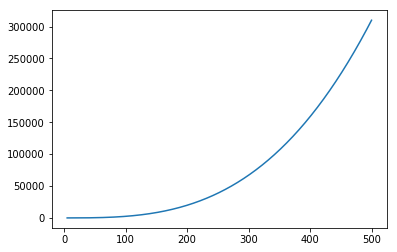

In [5]:
# Problem 5.9 (Heat Capacity of a Solid)

# Implementing the gaussxw 
import numpy as np
from numpy import exp,linspace
from numpy import ones,copy,cos,tan,pi,linspace

#from gaussxw import gaussxwab 
import matplotlib.pyplot as plt

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w


def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    G = 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w
    return G

# Determining the Heat Capacity: Initializing the values of different parameters
def f(x): 
    return x**4*np.exp(x)/(np.exp(x)-1)**2

def Cv(T):
    V=1e-3
    p= 6.022e28
    Kb = 1.38065e-23 
    thetaD=428
    A =  9*V*p*Kb*(T/thetaD)**3 

    # Defining points and weight of the integral
    T=5
    N = 50 
    a, b = 0, thetaD/T 
    xp,wp = gaussxwab(N,a,b)
    
    # Performing the integration
    I = 0 
    for i in range(N): 
        I += wp[i]*f(xp[i])
    return A*I

T = linspace(5,500,496)
Cvlist=[]
for i in range(496):
    Cvlist.append(Cv(T[i]))
    
plt.plot(T, Cvlist)
plt.show()